<a href="https://colab.research.google.com/github/PilouZer/PilouZer/blob/main/S5_dataset_regularization_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from mlxtend.plotting import plot_decision_regions

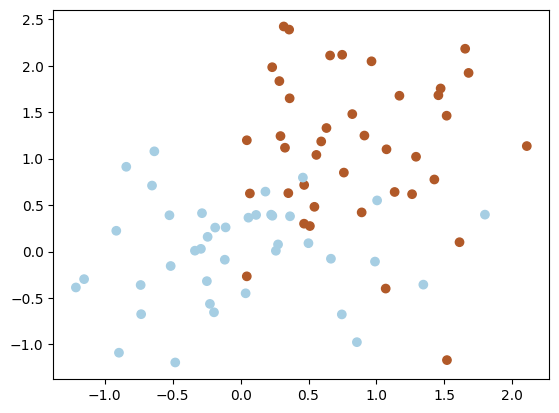

In [ ]:
centers = ([0, 0], [1, 1])
X_train, y_train = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
X_test, y_test = datasets.make_blobs(n_samples=80, centers = centers, cluster_std=0.7)
# Plotting
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

In [ ]:
my_first_neural_net = tf.keras.Sequential([
    layers.Input(shape=(2, ), name="input"),                                         
    layers.Dense(units=10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(units=1, activation="sigmoid", name="output")
])

In [ ]:
my_first_neural_net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 output (Dense)              (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
my_first_neural_net.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
                                  loss= tf.keras.losses.binary_crossentropy, 
                                  metrics=['accuracy'])

In [ ]:
history = my_first_neural_net.fit(X_train, y_train, epochs=5000, verbose=2)

9600/9600 [==============================] - 24s 2ms/step


TypeError: ignored

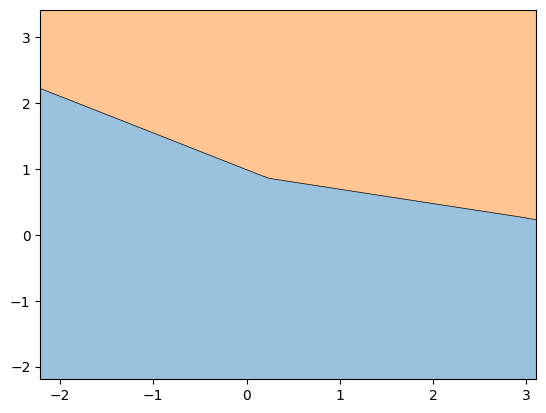

In [8]:
plot_decision_regions(X_train, y_train, clf=my_first_neural_net)
plt.show()

In [9]:
my_first_neural_net.evaluate(X_train, y_train)

3/3 [==============================] - 0s 8ms/step - loss: 0.3454 - accuracy: 0.8375


[0.34544211626052856, 0.8374999761581421]

In [10]:
my_first_neural_net.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 0.3522 - accuracy: 0.8625


[0.35217899084091187, 0.862500011920929]